## Titanic dataset Visualisation with Seaborn
# Аналіз даних пасажирів Титаніка

In [12]:
# Імпортуємо необхідні бібліотеки для роботи з даними та візуалізації
import numpy as np #для роботи з числовими масивами
import pandas as pd #робота з таблицями даних (DataFrame)
import seaborn as sns#Бібліотека для статистичної візуалізації
import matplotlib.pyplot as plt #Додав для налаштувань графіків

In [13]:
#Налаштую відображення графіків
plt.style.use('default')#Стиль графіків звичайний
sns.set_palette("husl")#Кольорова палітра
# Далі завантаження та підготовка даних

In [14]:
#Тут в змінну url записуємо посилання Titanic dataset з Google Drive
url = 'https://drive.google.com/uc?id=1zyYJMa75UXLjmODPRnl4_UrLJ0JKmEOC'
df = pd.read_csv(url)

### Missing Data

In [40]:
#Додам візуалізацію початкової структури
#Продивлюсь початкову структуру
print("Розмір dataset-у: ", df.shape)
print("Перші 5 записів: ")
print(df.head())
print("\nІнформація про колонки з файлу:")
print(df.info())



Розмір dataset-у:  (891, 12)
Перші 5 записів: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0

<Axes: >

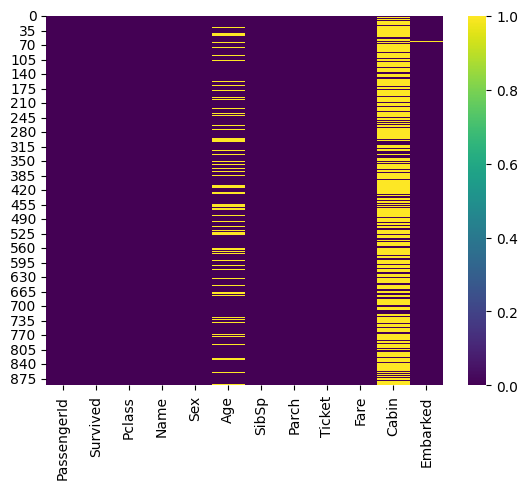

In [15]:
sns.heatmap(df.isnull(), cmap='viridis')

### Survived count
#Додам свій варіант візуалізації загальної кількості виживших, щоб було зрозуміло кількість загиблих порівняно з усіма пасажирами:

C:\Users\Paul\AppData\Local\Temp\ipykernel_24536\1725425715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Survived', data=df, palette=["#e74c3c", "#2ecc71"])#data=df - датафрейм наш


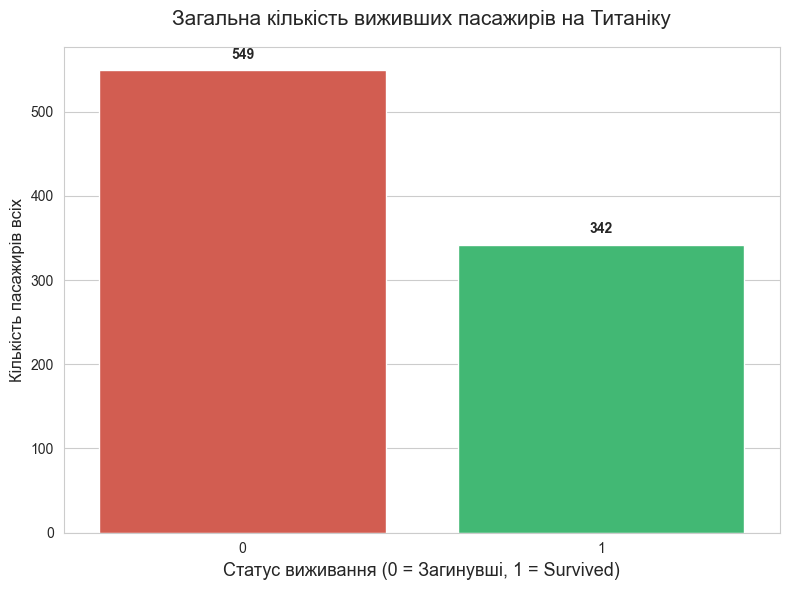

In [25]:
# x='Survived' - колонка для підрахунку (0=загинули, 1=вижили)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Survived', data=df, palette=["#e74c3c", "#2ecc71"])#data=df - датафрейм наш
#sns.countplot() для підрахунку значень кожної колонки
plt.title('Загальна кількість виживших пасажирів на Титаніку', fontsize=15, pad=16)
plt.xlabel('Статус виживання (0 = Загинувші, 1 = Survived)', fontsize=13)
plt.ylabel('Кількість пасажирів всіх', fontsize=12)

# Додам підписи на стовпці з точними цифрами, 
# тобто підписування кожного стовпчика з кількістю значень у стовпці 'Survived'
for i, v in enumerate(df['Survived'].value_counts().sort_index().values):
    ax.text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Тобто більшість пасажирів загинули

<Axes: xlabel='Survived', ylabel='count'>

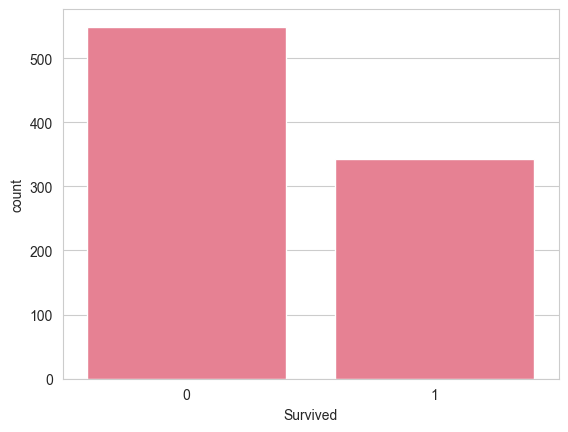

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

### Survived by sex
Виживання по статі


<Axes: xlabel='Survived', ylabel='count'>

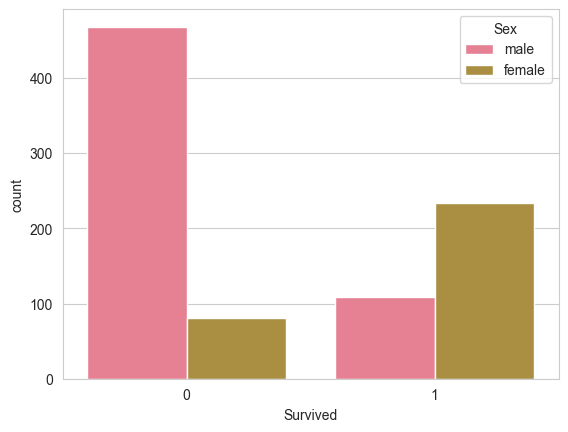

In [28]:
sns.countplot(x='Survived',hue='Sex',data=df) #розбиває дані по додатковій категорії (чоловіки/жінки)

In [30]:
#по графіку видно, що більше вижило жінок, додам візуалізацію у %:
survival_by_sex = df.groupby('Sex')['Survived'].mean() * 100
print("\nВідсоток виживання по статі є:")
print(f"Жінки: {survival_by_sex['female']:.1f}%")
print(f"Чоловіки: {survival_by_sex['male']:.1f}%")
#Групую(groupby) дані за статтю, обчислюю середнє значення колонки Survived для кожної групи, 
# що дає відсоток виживання (помножений на 100, звісно)


Відсоток виживання по статі є:
Жінки: 74.2%
Чоловіки: 18.9%


Жінки більші шанси на виживання мали, тому що в першу чергу евакуювалися, що стверджує візуалізація статистики.

### Survived by Cab Class
Виживання по класу кабін 

<Axes: xlabel='Survived', ylabel='count'>

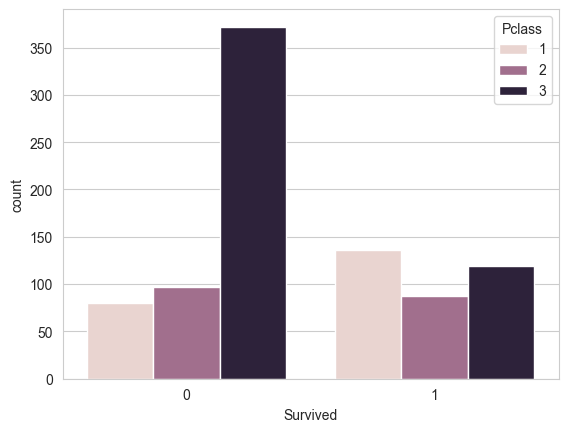

In [31]:
sns.countplot(x='Survived',hue='Pclass',data=df)

In [32]:
# Розрахунок відсотків виживання по класу
survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100
print("\nвідсоток виживання по класу кабіни:")
for pclass in [1, 2, 3]:
    print(f"{pclass}-й клас: {survival_by_class[pclass]:.1f}%")

# Робимо висновок: Пасажири вищого класу мали кращі шанси на виживання


відсоток виживання по класу кабіни:
1-й клас: 63.0%
2-й клас: 47.3%
3-й клас: 24.2%


Пасажири вищого класу мали кращі шанси на виживання

### Distribution of age
Розподіл віку пасажирів


<Axes: xlabel='Age', ylabel='Count'>

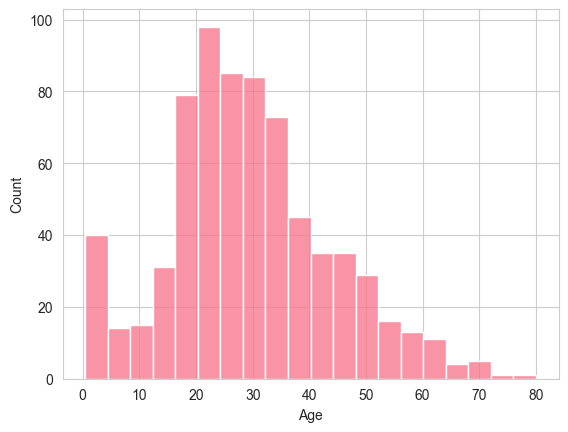

In [19]:
sns.histplot(df['Age'])

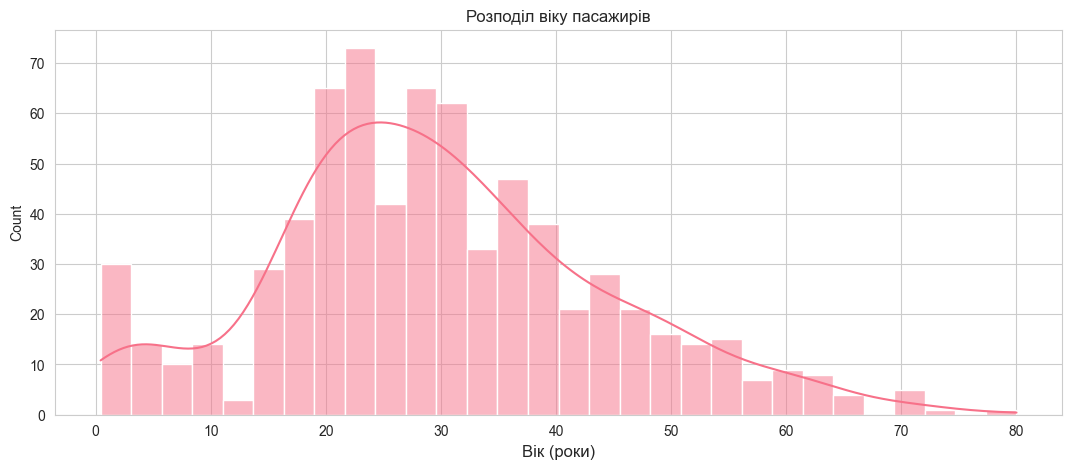

In [37]:
plt.figure(figsize=(13, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Розподіл віку пасажирів')
plt.xlabel('Вік (роки)', fontsize=12)
plt.show()
# sns.histplot() - функція будує гістограму розподілу
# bins=30 - кількість стовпців в гістограмі
# kde=True - додає криву

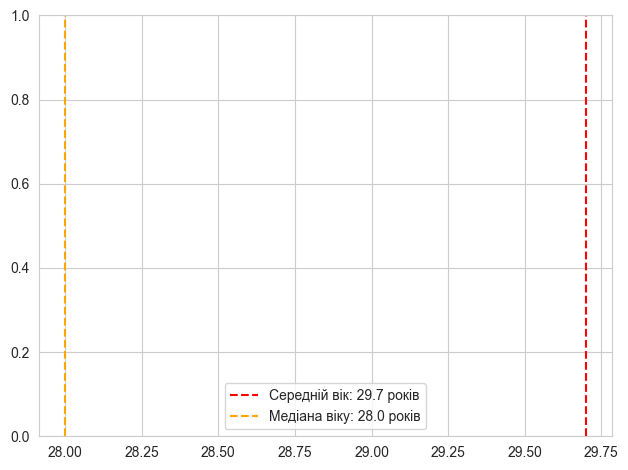

In [39]:
#статистична візуалізація з використанням вертикальних ліній
#додам лінії для статистичних показників
#позиції середнього віку
plt.axvline(df['Age'].mean(), color='red', linestyle='--', 
label=f'Середній вік: {df["Age"].mean():.1f} років')

#позиції медіани віку
plt.axvline(df['Age'].median(), color='orange', linestyle='--', 
label=f'Медіана віку: {df["Age"].median():.1f} років')
#Відображення legend з підписами ліній
plt.legend()
#автоматично ущільнення розміщення елементів графіку
plt.tight_layout()
#вивід
plt.show()
#Більшість пасажирів були молодими

Більшість пасажирів були молодими

Class / Age distribution

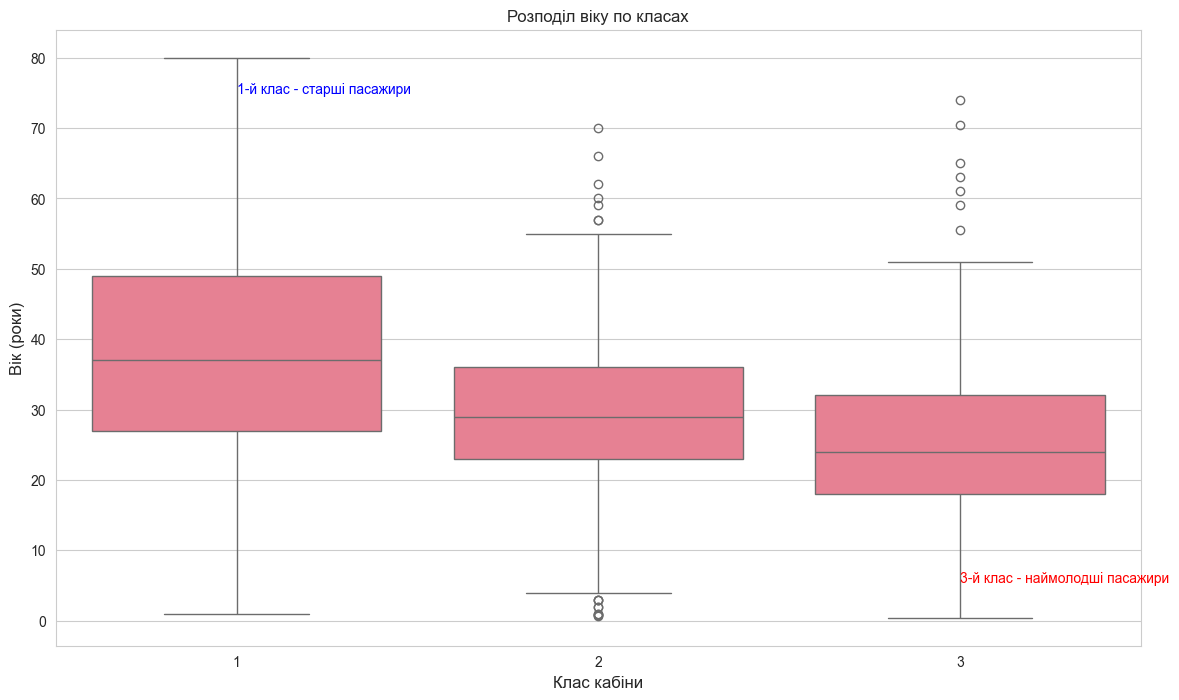

In [47]:
### Class / Age distribution
#Вік по класах
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='Pclass', y='Age') #створює коробчасті діаграми;x='Pclass' - категорії по горизонталі (класи кабін)  
plt.title('Розподіл віку по класах')
plt.text(0, df['Age'].max() - 5, '1-й клас - старші пасажири', color='blue', fontsize=10)
plt.text(2, df['Age'].min() + 5, '3-й клас - наймолодші пасажири', color='red', fontsize=10)
plt.xlabel('Клас кабіни', fontsize=12)
plt.ylabel('Вік (роки)', fontsize=12)
plt.show()

Отже, пасажири 1-го класу були старіше, 3-го класу - молодшими

<Axes: xlabel='Pclass', ylabel='Age'>

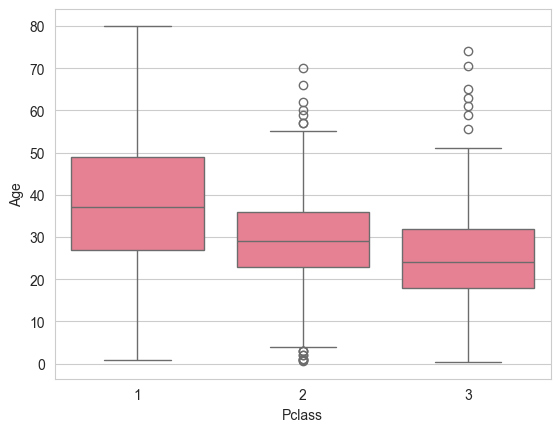

In [20]:
sns.boxplot(
    x='Pclass',
    y='Age',
    data=df
)